Index(['Block_No', 'Trans_No', 'DT', 'TM', 'Lock_Time', 'Trans_Size',
       'Trans_Weight', 'Total_input', 'Total_Output', 'Fees',
       'Reward_For_Block', 'Number_Input_Addr', 'Number_Output_Addr',
       'Replaced_By_Fee', 'Est_Trans_Vol'],
      dtype='object')


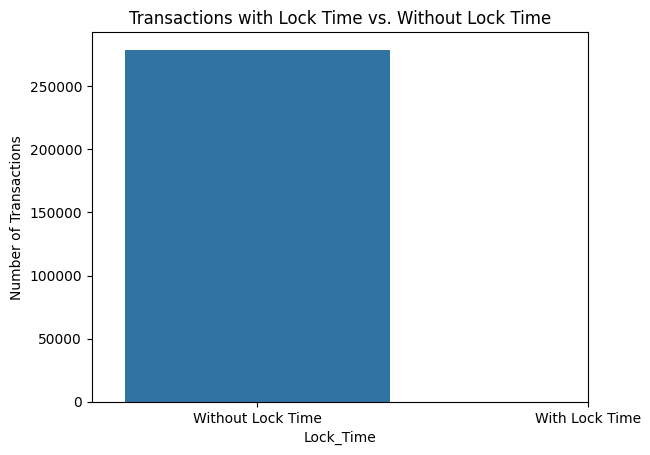

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)
lock_time_missing = df['Lock_Time'].isna().sum()
lock_time_not_missing = df['Lock_Time'].notna().sum()

sns.countplot(x=df['Lock_Time'].notna())
plt.title('Transactions with Lock Time vs. Without Lock Time')
plt.xticks([0, 1], ['Without Lock Time', 'With Lock Time'])
plt.ylabel('Number of Transactions')
plt.show()


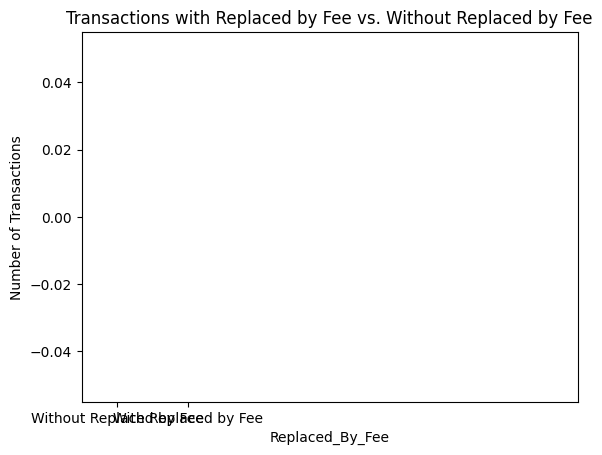

In [8]:
# Plot the count of transactions with and without 'Replaced_by_fee'
sns.countplot(x=df['Replaced_By_Fee'])
plt.title('Transactions with Replaced by Fee vs. Without Replaced by Fee')
plt.xticks([0, 1], ['Without Replaced by Fee', 'With Replaced by Fee'])
plt.ylabel('Number of Transactions')
plt.show()


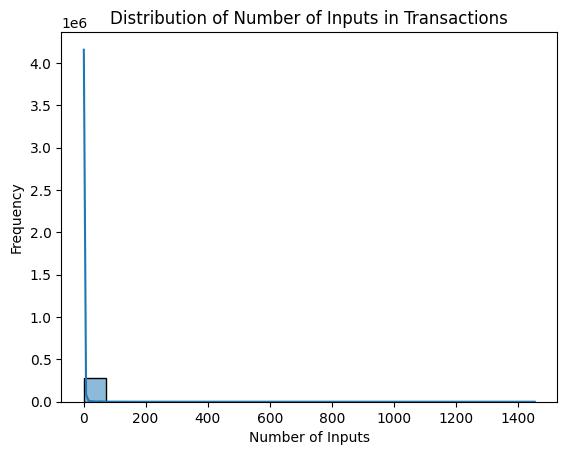

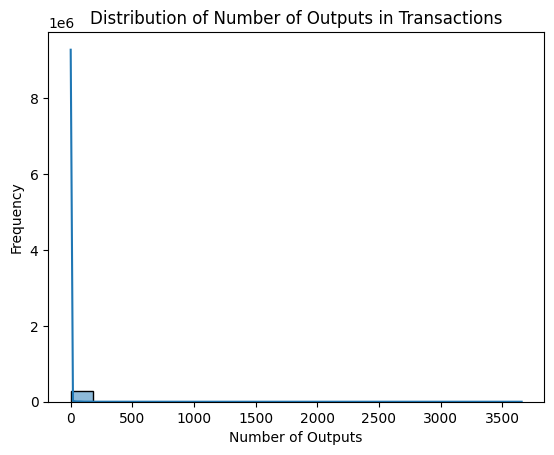

In [11]:

sns.histplot(df['Number_Input_Addr'], kde=True, bins=20)
plt.title('Distribution of Number of Inputs in Transactions')
plt.xlabel('Number of Inputs')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of number of outputs
sns.histplot(df['Number_Output_Addr'], kde=True, bins=20)
plt.title('Distribution of Number of Outputs in Transactions')
plt.xlabel('Number of Outputs')
plt.ylabel('Frequency')
plt.show()


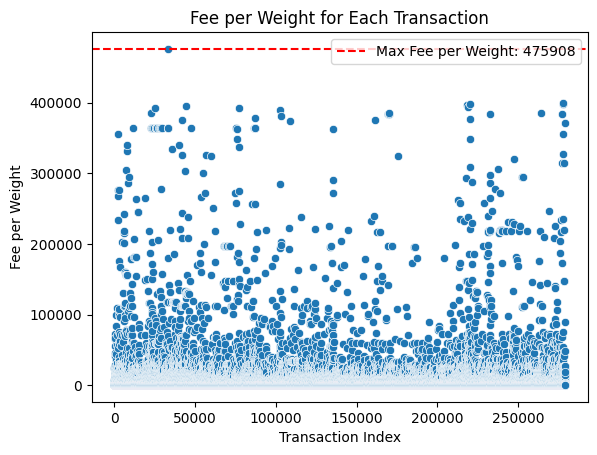

Most Efficient Transaction:
Block_No                                                         729779
Trans_No              643db3316e3e357ae64ad9b7300d713fa2520a9eef8e20...
DT                                                           2022/03/31
TM                                                             03:09:36
Lock_Time                                                             0
Trans_Size                                                       118977
Trans_Weight                                                     475908
Total_input                                               12722354804.0
Total_Output                                                12722354804
Fees                                                                  0
Reward_For_Block                                                    NaN
Number_Input_Addr                                                     1
Number_Output_Addr                                                 3656
Replaced_By_Fee                     

In [15]:
# Calculate the fee per weight (assuming 'Fee' and 'Weight' columns exist in your data)
df['Fee_per_Weight'] = df['Fees'] / df['Trans_Weight']

# Find the transaction with the highest fee per weight
max_fee_per_weight_transaction = df.loc[df['Trans_Weight'].idxmax()]

# Plot the fee per weight
sns.scatterplot(x=df.index, y='Trans_Weight', data=df)
plt.axhline(y=max_fee_per_weight_transaction['Trans_Weight'], color='r', linestyle='--', label=f'Max Fee per Weight: {max_fee_per_weight_transaction["Trans_Weight"]}')
plt.title('Fee per Weight for Each Transaction')
plt.xlabel('Transaction Index')
plt.ylabel('Fee per Weight')
plt.legend()
plt.show()

# Output the most efficient transaction
print("Most Efficient Transaction:")
print(max_fee_per_weight_transaction)
